# 1: Build a transfer Learning image classification model using the VGG16 & VGG19 (Pre-trained Network)

In [18]:
# Import Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import os

import warnings
warnings.filterwarnings("ignore")

In [19]:
# Test and Train path
train_path = "/Users/anubhavshroti/Desktop/AI Solutions/seg_train"
test_path = "/Users/anubhavshroti/Desktop/AI Solutions/seg_test"

In [20]:
# The number of classes of dataset
numberOfClass = len(glob(train_path + "/*"))
print("Number Of Class: ", numberOfClass)


Number Of Class:  6


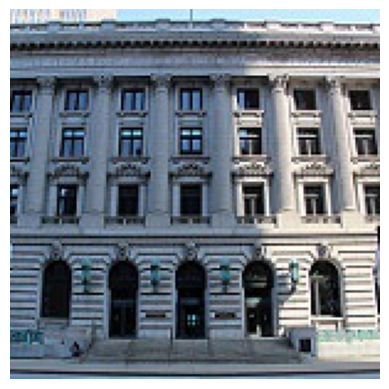

In [21]:
#from keras.preprocessing.image import load_img
#import matplotlib.pyplot as plt

# Adjust the relative path based on your directory structure
image_path = "/Users/anubhavshroti/Desktop/AI Solutions/seg_train/buildings/53.jpg"

# Visualize
img = load_img(image_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [22]:
# The images size in dataset.
image_shape = img_to_array(img)
print(image_shape.shape)


(150, 150, 3)


In [23]:
# Prepare the datasef for vgg16
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


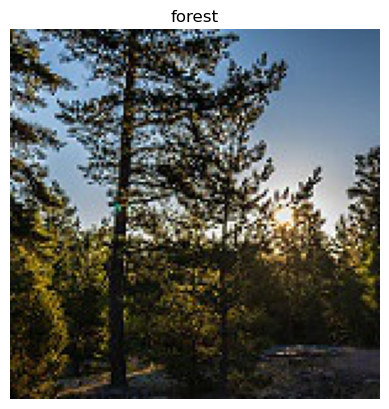

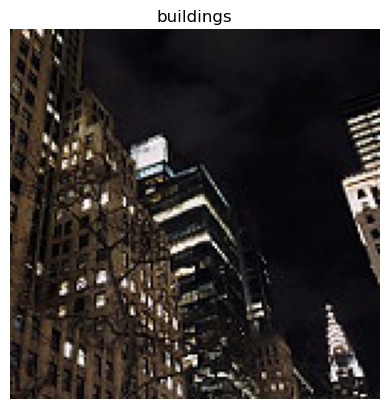

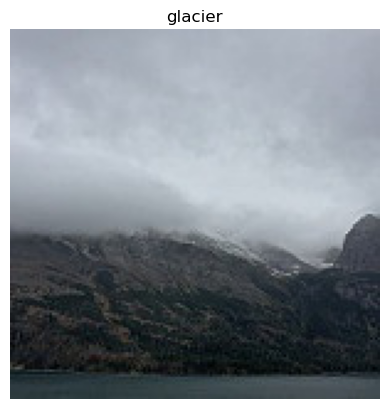

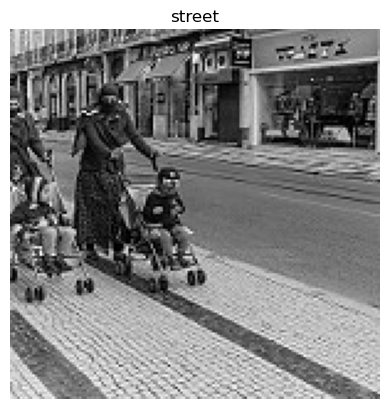

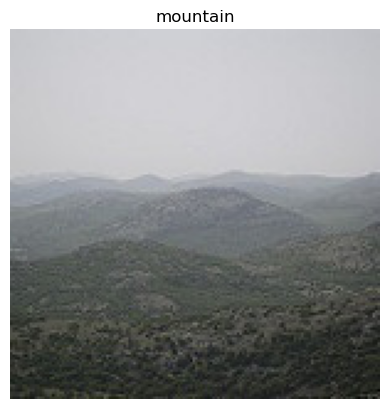

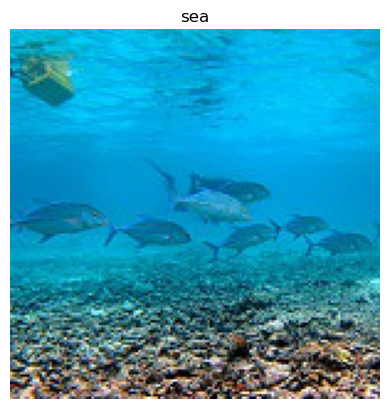

In [24]:
for i in os.listdir(train_path):
    if not i.startswith('.'):  # Exclude hidden files/directories
        for j in os.listdir(os.path.join(train_path, i)):
            img_path = os.path.join(train_path, i, j)
            img = load_img(img_path)
            plt.imshow(img)
            plt.title(i)
            plt.axis("off")
            plt.show()
            break


In [25]:
# Import model
vgg16 = VGG16()

In [9]:
# Layers of vgg16 
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
# layers of vgg16
vgg16_layer_list = vgg16.layers
for i in vgg16_layer_list:
    print(i)

In [27]:
# add the layers of vgg16 in my created model.
vgg16Model = Sequential()
for i in range(len(vgg16_layer_list)-1):
    vgg16Model.add(vgg16_layer_list[i])

In [28]:
# the final version of the model
vgg16Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [29]:
# Close the layers of vgg16
for layers in vgg16Model.layers:
    layers.trainable = False

In [30]:
# Last layer
vgg16Model.add(Dense(numberOfClass, activation = "softmax"))

In [31]:
# After I added last layer in created model.
vgg16Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [32]:
# I create compile part.
vgg16Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [33]:
# Traning with model
batch_size = 32

hist_vgg16 = vgg16Model.fit_generator(train_data, 
                                      steps_per_epoch = 1600 // batch_size, 
                                      epochs = 10, 
                                      validation_data = test_data, 
                                      validation_steps = 800 // batch_size)

Epoch 1/10
50/50 [==============================] - 3589s 73s/step - loss: 0.7220 - accuracy: 0.7588 - val_loss: 0.4678 - val_accuracy: 0.8363
Epoch 2/10
50/50 [==============================] - 851s 17s/step - loss: 0.4247 - accuracy: 0.8575 - val_loss: 0.5494 - val_accuracy: 0.8238
Epoch 3/10
50/50 [==============================] - 478s 10s/step - loss: 0.4340 - accuracy: 0.8637 - val_loss: 0.4340 - val_accuracy: 0.8575
Epoch 4/10
50/50 [==============================] - 455s 9s/step - loss: 0.4095 - accuracy: 0.8694 - val_loss: 0.4873 - val_accuracy: 0.8388
Epoch 5/10
50/50 [==============================] - 463s 9s/step - loss: 0.3763 - accuracy: 0.8831 - val_loss: 0.4107 - val_accuracy: 0.8712
Epoch 6/10
50/50 [==============================] - 461s 9s/step - loss: 0.3868 - accuracy: 0.8888 - val_loss: 0.4457 - val_accuracy: 0.8587
Epoch 7/10
50/50 [==============================] - 464s 9s/step - loss: 0.3549 - accuracy: 0.9000 - val_loss: 0.4584 - val_accuracy: 0.8700
Epoch 8/1

In [35]:
# Save the weights of model
vgg16Model.save_weights("deneme.h5")

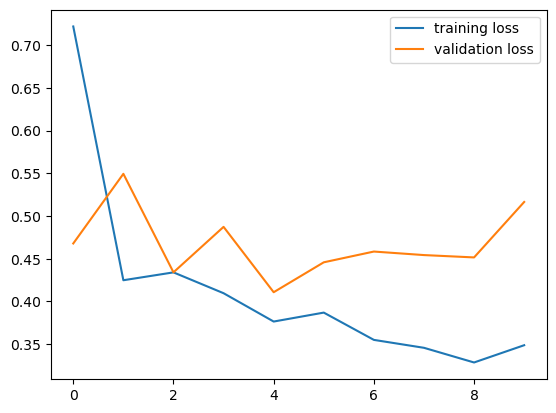

In [36]:
# Loss and Validation Loss
plt.plot(hist_vgg16.history["loss"], label = "training loss")
plt.plot(hist_vgg16.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

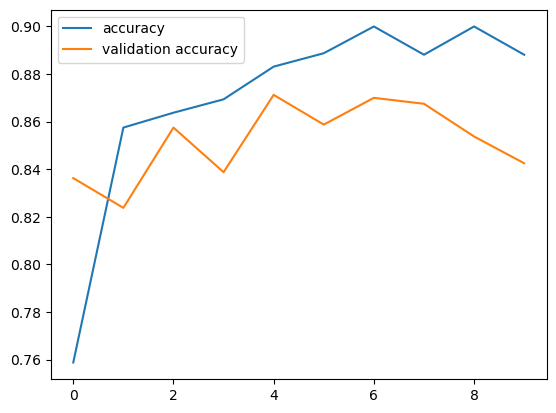

In [37]:
# Accuracy and Validation Accuracy
plt.plot(hist_vgg16.history["accuracy"], label = "accuracy")
plt.plot(hist_vgg16.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

In [38]:
import json, codecs
with open("deneme.json","w") as f:
    json.dump(hist_vgg16.history, f)

In [39]:
with codecs.open("./deneme.json","r", encoding = "utf-8") as f:
    load_result = json.loads(f.read())

In [40]:
load_result

{'loss': [0.7220448851585388,
  0.42474400997161865,
  0.43395623564720154,
  0.4095461666584015,
  0.3763473927974701,
  0.3868304491043091,
  0.3548624813556671,
  0.34558314085006714,
  0.3283939063549042,
  0.348622590303421],
 'accuracy': [0.7587500214576721,
  0.8575000166893005,
  0.8637499809265137,
  0.8693749904632568,
  0.8831250071525574,
  0.8887500166893005,
  0.8999999761581421,
  0.8881250023841858,
  0.8999999761581421,
  0.8881250023841858],
 'val_loss': [0.46781980991363525,
  0.5494179725646973,
  0.43400728702545166,
  0.4872802793979645,
  0.41070595383644104,
  0.4457496404647827,
  0.4583556354045868,
  0.4542245864868164,
  0.45147213339805603,
  0.5164536833763123],
 'val_accuracy': [0.8362500071525574,
  0.8237500190734863,
  0.8575000166893005,
  0.8387500047683716,
  0.8712499737739563,
  0.8587499856948853,
  0.8700000047683716,
  0.8675000071525574,
  0.8537499904632568,
  0.8424999713897705]}

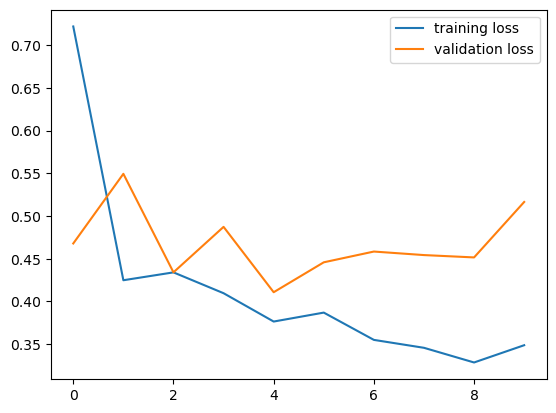

In [41]:
# Loss And Validation Loss
plt.plot(load_result["loss"], label = "training loss")
plt.plot(load_result["val_loss"], label = "validation loss")
plt.legend()
plt.show()

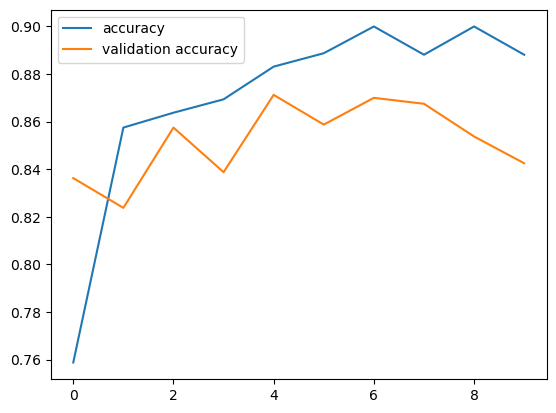

In [42]:
# Accuracy And Validation Accuracy
plt.plot(load_result["accuracy"], label = "accuracy")
plt.plot(load_result["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

In [43]:
# Import VGG19 model
vgg19 = VGG19()

In [44]:
# Layers of vgg19
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
# Layers of vgg19 
vgg19_layer_list = vgg19.layers
for i in vgg19_layer_list:
    print(i)

In [46]:
# add the layers of vgg16 in my created model.
vgg19Model = Sequential()
for i in range(len(vgg19_layer_list)-1):
    vgg19Model.add(vgg19_layer_list[i])

In [47]:
# Finish version of my created model.
vgg19Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [48]:
# Close the layers of vgg16
for layers in vgg19Model.layers:
    layers.trainable = False

In [49]:
#Last layer
vgg19Model.add(Dense(numberOfClass, activation = "softmax"))

In [50]:
# the final version of the model
vgg19Model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [51]:
# I create compile part.
vgg19Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [52]:
# Training with my created model
hisy_vgg19 = vgg19Model.fit_generator(train_data,
                               steps_per_epoch = 1600 // batch_size,
                               epochs = 10,
                               validation_data = test_data,
                               validation_steps = 800 // batch_size)

Epoch 1/10
50/50 [==============================] - 34571s 705s/step - loss: 0.6459 - accuracy: 0.7755 - val_loss: 0.3836 - val_accuracy: 0.8825
Epoch 2/10
50/50 [==============================] - 587s 12s/step - loss: 0.4389 - accuracy: 0.8537 - val_loss: 0.3615 - val_accuracy: 0.8813
Epoch 3/10
50/50 [==============================] - 617s 12s/step - loss: 0.3394 - accuracy: 0.8869 - val_loss: 0.4771 - val_accuracy: 0.8512
Epoch 4/10
50/50 [==============================] - 617s 12s/step - loss: 0.3816 - accuracy: 0.8788 - val_loss: 0.5014 - val_accuracy: 0.8487
Epoch 5/10
50/50 [==============================] - 648s 13s/step - loss: 0.4104 - accuracy: 0.8763 - val_loss: 0.4128 - val_accuracy: 0.8575
Epoch 6/10
50/50 [==============================] - 641s 13s/step - loss: 0.3456 - accuracy: 0.8956 - val_loss: 0.4064 - val_accuracy: 0.8813
Epoch 7/10
50/50 [==============================] - 617s 12s/step - loss: 0.3491 - accuracy: 0.8825 - val_loss: 0.4718 - val_accuracy: 0.8450
Epo

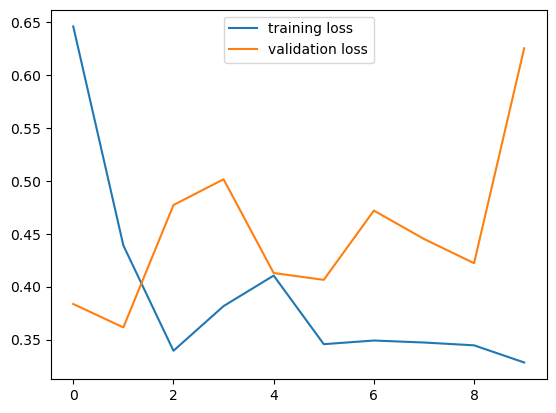

In [53]:
# Loss And Validation Loss
plt.plot(hisy_vgg19.history["loss"], label = "training loss")
plt.plot(hisy_vgg19.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

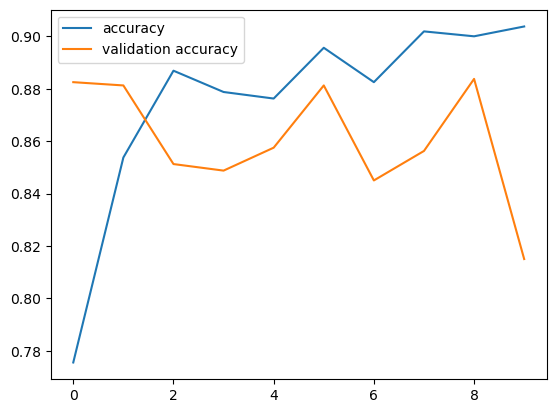

In [54]:
# Accuracy And Validation Accuracy
plt.plot(hisy_vgg19.history["accuracy"], label = "accuracy")
plt.plot(hisy_vgg19.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()


# Q2:

In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers

In [56]:
labels=pd.read_csv('/Users/anubhavshroti/Desktop/AI Solutions/monkey_labels.txt')

In [57]:
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [66]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

directory_path = '/Users/anubhavshroti/Desktop/AI Solutions/monkey_images'

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Flow from directory
training_set = train_datagen.flow_from_directory(directory_path,
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='categorical')


Found 0 images belonging to 0 classes.


In [69]:
import os

# Convert relative path to absolute path
abs_path = os.path.abspath('/Users/anubhavshroti/Desktop/AI Solutions/monkey_images')

test_set = train_datagen.flow_from_directory(abs_path,
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='categorical')


Found 0 images belonging to 0 classes.


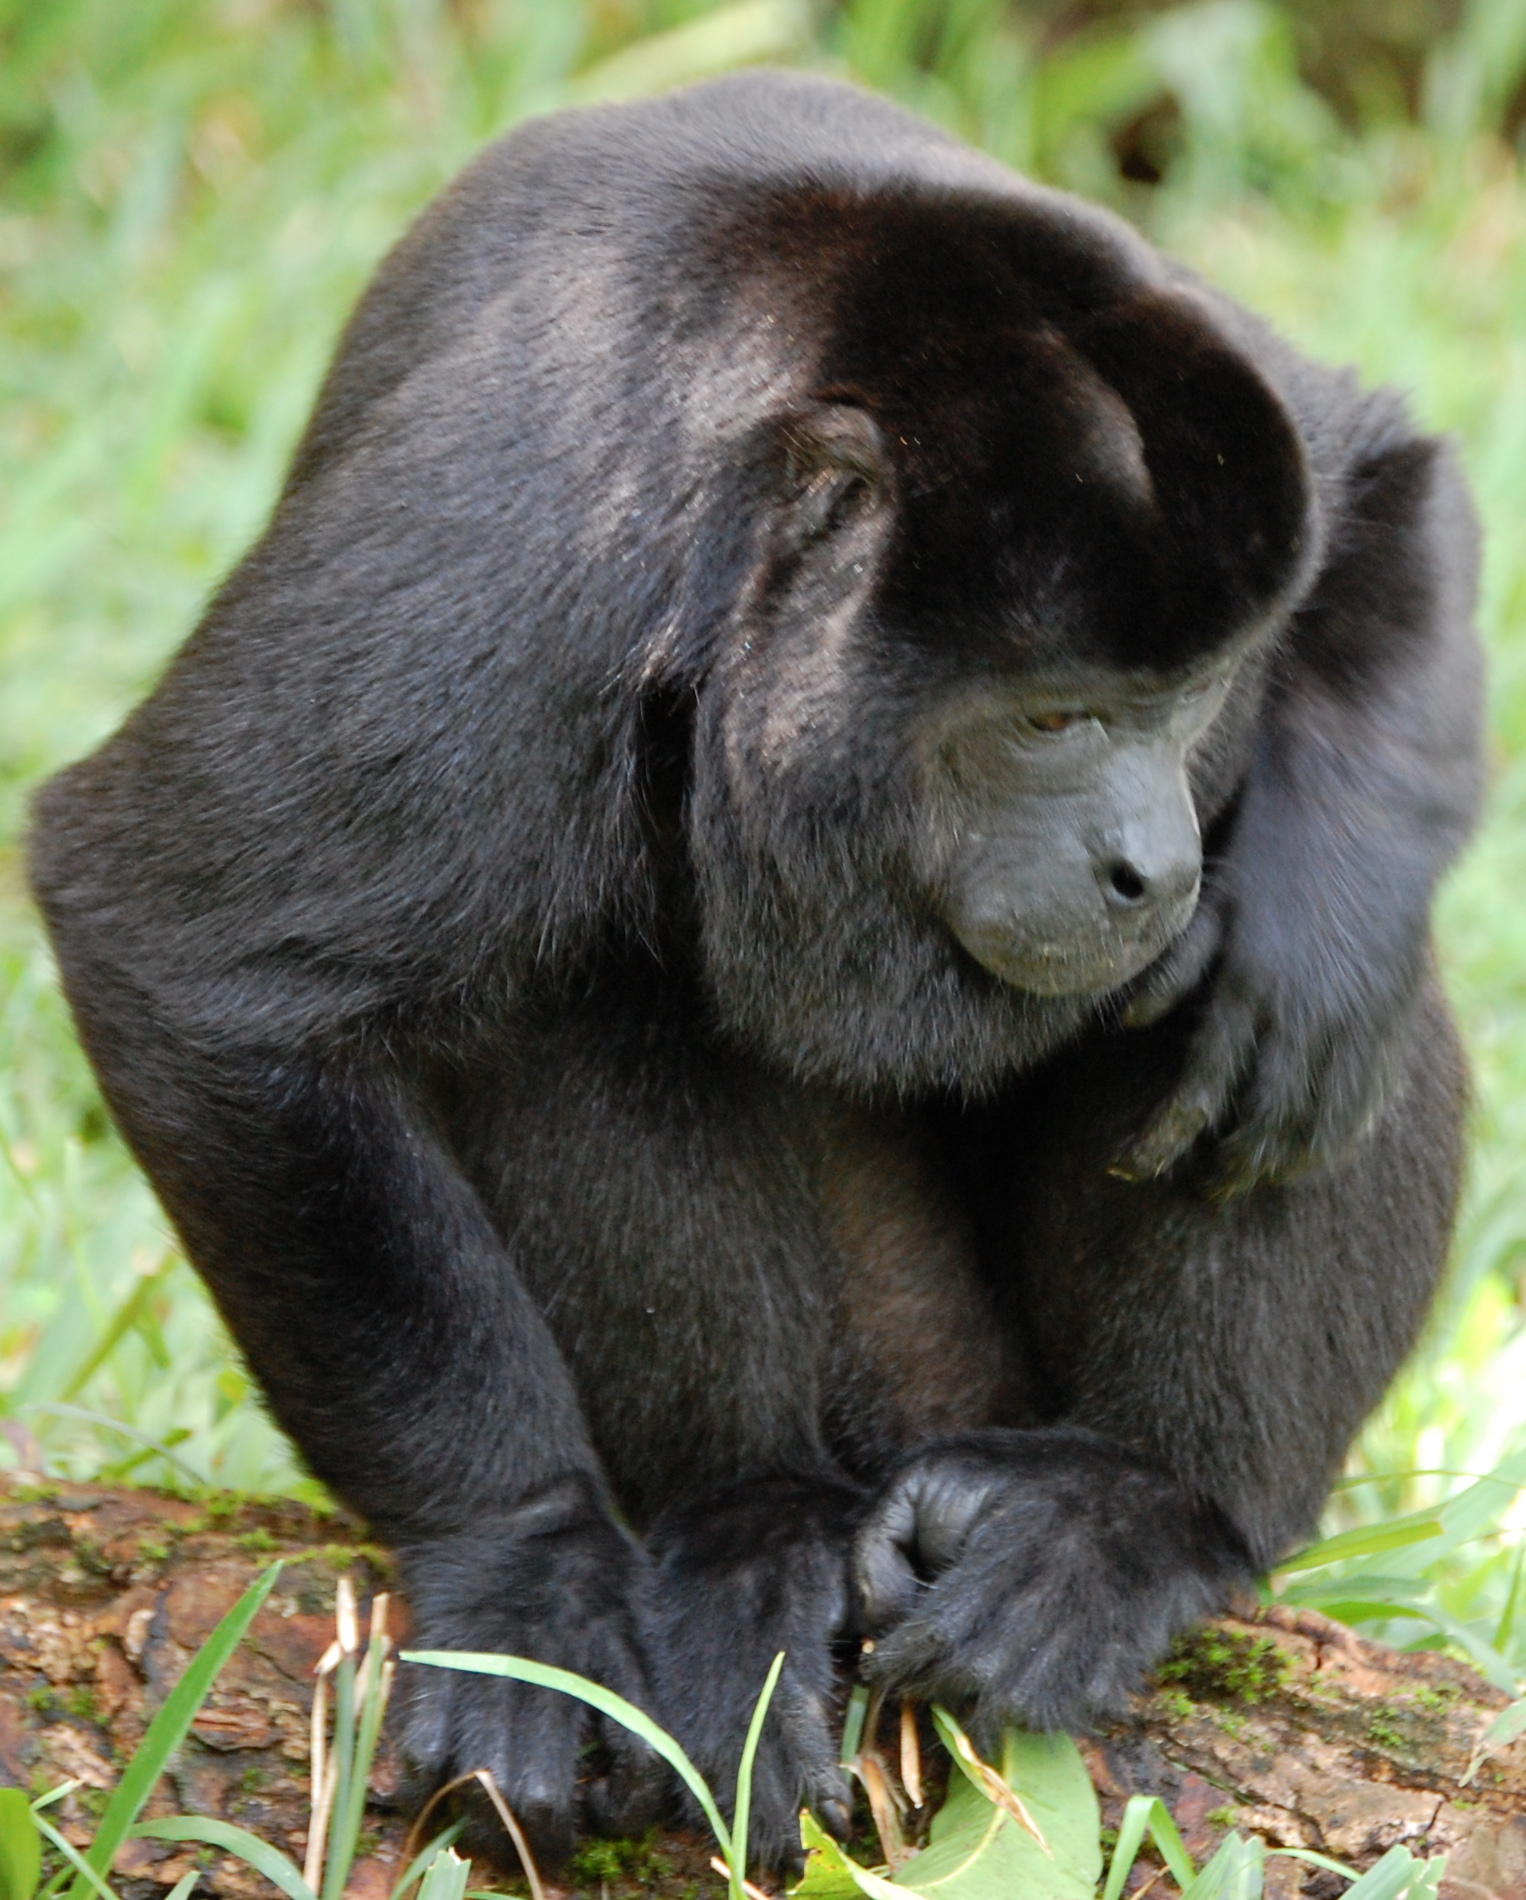

In [73]:
import IPython.display as ipd
ipd.Image('/Users/anubhavshroti/Desktop/AI Solutions/data/training/n0/n0022.jpg')

In [74]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 81s 1us/step


In [75]:
x=base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(10, activation='sigmoid')(x)

inception = tf.keras.models.Model(base_model.input, x)
inception.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 13, 13, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 13, 13, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 13, 13, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 13, 13, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 13, 13, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 13, 13, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 13, 13, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 13, 13, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 13, 13, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 13, 13, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 6, 6, 384)            995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 6, 6, 192)            147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 6, 6, 192)            172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 6, 6, 192)            172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 6, 6, 192)            147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 6, 6, 192)            576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 6, 6, 768)            0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 6, 6, 192)            147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 6, 6, 192)            215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 6, 6, 192)            215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 6, 6, 160)            0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 6, 6, 160)            0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 6, 6, 768)            0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 6, 6, 192)            576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 6, 6, 192)            576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 6, 6, 192)            0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 6, 6, 192)            0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 2, 2, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 2, 2, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 2, 2, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 2, 2, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 2, 2, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 2, 2, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 2, 2, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 2, 2, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 2, 2, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 2, 2, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [79]:
print(len(training_set))
print(len(test_set))


0
0


In [ ]:
# Assuming 'base_model' is loaded with InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(10, activation='sigmoid')(x)

inception = models.Model(base_model.input, x)

# Compile the model
inception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming 'training_set' and 'test_set' are properly configured ImageDataGenerators
# Make sure to set the correct directory paths and verify that the directories contain valid images
Inception_hist = inception.fit(training_set, validation_data=test_set, epochs=20)
